## Brazil COVID-19 Data Wrangling

#### Name: Ghulam Shah

The purpose of this project is to showcase my data wrangling skills.  I use an Excel file called `BrazilCOVIDData.xlsx` - be sure to put the data file in the same directory as this Jupyter Notebook.

Please note that it will take around 5 minutes to read-in all of the data in this file.

#### Requirements

The task for this assignment is to perform the data preparation necessary in order to be able to train a mode. I will construct a Jupyter notebook that reads in data from the supplied Excel file, then performs the necessary data manipulations to obtain two Pandas DataFrames. The first DataFrame will be called features, which is your feature matrix. The features DataFrame will contain the following feature columns in this exact order: days_cube, days_sq, days, temp, pop_dense_sq, pop_dense, pop.

Note that days_cube and days_sq are the cubed and squared values of days, respectively. Days is the number of days since the outbreak began, which begins with zero. pop_dense_sq is the squared value of pop_dense, and pop is the city population. The second DataFrame contains target values and will be called response, which are the accumulated case counts for all capital cities over time. The task is to construct these two Pandas DataFrames using the data provided.

Some things to note: There are 27 capital cities in Brazil. Each capital city has 151 days of recorded data starting from day zero, which is the day of the first outbreak. One of the Excel sheets spells a capital city Aracajú with an accent, whereas the other sheets spell the same capital city as Aracaju - beware. Population density is defined as the population of a city divided by the area in kilometers squared of the city.

In [1]:
# Common Imports
import pandas as pd
import numpy as np
import datetime
from datetime import date
from datetime import timedelta

# Importing data from sheets within Excel File
fileName = "BrazilCOVIDData.xlsx"
xls = pd.ExcelFile(fileName)
df1 = pd.read_excel(xls, 'Brazil Covid-19 data')
df2 = pd.read_excel(xls, 'Original Column Names')
df3 = pd.read_excel(xls, 'Temperature by State')
df4 = pd.read_excel(xls, 'Brazil State Stats')
df5 = pd.read_excel(xls, 'City area')

In [2]:
# finding the 27 capital cities in Brazil
df3

,STATE_ABBR,STATE,CITY,IS_CAPITOL,ANNUAL,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEARS,# CITIES
0,AC,Acre,NaN,NaN,77.2,78.0,77.9,77.4,77.1,76.0,75.0,74.4,76.0,77.8,78.3,78.3,78.3,28,4
1,AC,Acre,"CRUSEIRO DO SUL, ACRE",NaN,76.8,77.5,77.2,77.2,76.8,76.5,75.2,74.8,76.5,77.0,77.4,77.4,77.4,28,1
2,AC,Acre,"FLORESCENCIA, ACRE",NaN,80.0,80.0,80.0,80.0,79.0,78.0,77.0,77.0,79.0,80.0,81.0,81.0,81.0,28,1
3,AC,Acre,"SENA MADUREIRA, ACRE",NaN,75.0,77.0,77.0,75.0,75.0,73.0,73.0,71.0,73.0,77.0,77.0,77.0,77.0,28,1
4,AC,Acre,"TARAUACÁ, ACRE",NaN,76.8,77.5,77.5,77.5,77.4,76.5,74.8,74.7,75.6,77.0,77.9,77.9,77.9,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,TO,TOCANTINS,"PARANÃ, TOCANTINS",NaN,77.0,77.0,77.2,77.9,77.9,76.1,73.6,73.2,75.9,79.7,79.5,78.1,77.5,30,1
59,TO,TOCANTINS,"PEIXE, TOCANTINS",NaN,78.1,77.9,77.9,78.3,78.8,78.1,75.4,75.4,78.1,80.8,80.2,79.0,77.9,30,1
60,TO,TOCANTINS,"PORTO NACIONAL, TOCANTINS",NaN,79.0,77.9,77.7,78.1,79.0,79.2,77.5,77.5,80.4,82.4,80.4,79.3,78.3,30,1
61,TO,TOCANTINS,"TAGUATINGA, TOCANTINS",NaN,76.3,75.6,75.7,75.9,76.3,75.6,74.5,74.1,77.2,79.9,78.3,76.5,75.7,30,1


In [3]:
# dropping missing values so that we only keep a column of the 27 city capitals
df3.dropna(subset = ["IS_CAPITOL"], inplace=True)

# viewing the dataframe to verify
df3

,STATE_ABBR,STATE,CITY,IS_CAPITOL,ANNUAL,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,YEARS,# CITIES
5,AC,Acre,Rio Branco,Y,76.6,77.5,77.4,77.7,77.4,75.9,73.9,73.8,75.6,77.4,78.3,78.1,77.7,28,1
6,AL,Alagoas,Maceió,Y,76.6,79.7,79.7,79.5,78.8,77.4,75.7,74.5,74.5,75.7,77.5,78.6,79.2,30,1
8,AP,Amapa,Macapá,Y,79.9,78.6,78.3,78.3,78.8,79.2,79.2,79.0,80.2,81.5,82.4,82.0,80.8,23,1
10,AM,Amazonas,Manaus,Y,81.0,81.0,80.0,81.0,81.0,81.0,81.0,81.0,82.0,83.0,83.0,83.0,81.0,31,1
12,BA,Bahai,Salvador,Y,77.5,79.5,79.7,79.9,79.2,77.4,75.7,74.7,74.5,75.7,77.2,77.9,78.6,78,1
14,CE,Ceara,Fortaleza,Y,79.9,80.8,80.3,79.6,79.2,79.1,78.5,78.1,78.8,79.6,80.5,81.0,81.1,78,1
16,DF,Distrito Federal,Brasília,Y,69.1,70.2,70.3,70.7,69.6,67.3,65.3,64.9,68.5,71.1,70.9,70.0,69.8,33,1
18,ES,Espirito Santo,Vitória,Y,75.6,79.2,80.1,79.7,77.2,73.9,72.1,70.9,72.0,73.0,74.3,75.9,77.9,30,1
20,GO,Goias,Goiânia,y,73.8,74.8,74.8,75.2,74.5,72.0,69.6,69.6,73.4,76.1,76.3,75.4,74.3,28,1
22,MA,MARANHAO,São Luís,y,79.0,79.0,78.3,78.1,78.4,78.6,78.6,78.1,78.6,79.3,79.9,80.4,80.1,71,1


In [4]:
# confirming the amount of capital cities listed
len(df3)

27

In [5]:
# create a list of the capital cities from the dataframe
capcity = df3["CITY"].values.tolist()
capcity

['Rio Branco',
 'Maceió',
 'Macapá',
 'Manaus',
 'Salvador',
 'Fortaleza',
 'Brasília',
 'Vitória',
 'Goiânia',
 'São Luís',
 'Cuiabá',
 'Campo Grande',
 'Belo Horizonte',
 'Belém',
 'João Pessoa',
 'Curitiba',
 'Recife',
 'Teresina',
 'Rio de Janeiro',
 'Natal',
 'Porto Alegre',
 'Porto Velho',
 'Boa Vista',
 'Florianópolis',
 'São Paulo',
 'Aracaju',
 'Palmas']

In [6]:
# with the capital city list, we iterate over the main dataframe to create a new df
# this will only keep rows from cities with the same name as the 27 capital cities
dfnew = df1[df1.Municipality.isin(capcity)]
dfnew

,Region,State,Municipality,State-code,Municipality-code,Health-region-code,Health-region-name,Date,Week #,Population as of 2019,Accumulated cases,New cases,Accumulated deaths,New deaths,New Recoveries,New followups (?),Interior/Metropolitan
7663,Norte,RO,Porto Velho,11,110020.0,11004.0,MADEIRA-MAMORE,2020-03-27,13,529544,0,0,0,0,NaN,NaN,1.0
7664,Norte,RO,Porto Velho,11,110020.0,11004.0,MADEIRA-MAMORE,2020-03-28,13,529544,5,5,0,0,NaN,NaN,1.0
7665,Norte,RO,Porto Velho,11,110020.0,11004.0,MADEIRA-MAMORE,2020-03-29,14,529544,5,0,0,0,NaN,NaN,1.0
7666,Norte,RO,Porto Velho,11,110020.0,11004.0,MADEIRA-MAMORE,2020-03-30,14,529544,5,0,0,0,NaN,NaN,1.0
7667,Norte,RO,Porto Velho,11,110020.0,11004.0,MADEIRA-MAMORE,2020-03-31,14,529544,6,1,1,1,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846765,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-08-20,34,3015268,143759,1997,2200,52,NaN,NaN,1.0
846766,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-08-21,34,3015268,145452,1693,2242,42,NaN,NaN,1.0
846767,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-08-22,34,3015268,147127,1675,2257,15,NaN,NaN,1.0
846768,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-08-23,35,3015268,148998,1871,2274,17,NaN,NaN,1.0


In [7]:
# confirming the amount of rows we should have (151 * 27 = 4077)
len(dfnew['Municipality'])

5134

In [8]:
# we were expecting a lenght of 4077 = (27*151), not 5134
# we discovered that multiple areas have the same name as city capitals
# therefore, the iteration kept rows for cities that are not capitals
# we need to drop the extra rows that are not for city capitals
# Palmas
dfnew = dfnew.drop(dfnew[(dfnew['Municipality'] == 'Palmas') & (dfnew['State'] != 'TO')].index)    
len(dfnew.loc[dfnew['Municipality'] == 'Palmas'])

151

In [9]:
# double checking the lenghts of the new df column to verify it has 151 values
# Boa Vista
dfnew = dfnew.drop(dfnew[(dfnew['Municipality'] == 'Boa Vista') & (dfnew['State'] != 'RR')].index)    
len(dfnew.loc[dfnew['Municipality'] == 'Boa Vista'])

151

In [10]:
# Belém
dfnew = dfnew.drop(dfnew[(dfnew['Municipality'] == 'Belém') & (dfnew['State'] != 'PA')].index)    
len(dfnew.loc[dfnew['Municipality'] == 'Belém'])

151

In [11]:
# Campo Grande
dfnew = dfnew.drop(dfnew[(dfnew['Municipality'] == 'Campo Grande') & (dfnew['State'] != 'MS')].index)    
len(dfnew.loc[dfnew['Municipality'] == 'Campo Grande'])

151

In [12]:
# Rio Branco
dfnew = dfnew.drop(dfnew[(dfnew['Municipality'] == 'Rio Branco') & (dfnew['State'] != 'AC')].index)    
len(dfnew.loc[dfnew['Municipality'] == 'Rio Branco'])

151

In [13]:
# double check to verify we now have the correct lenght for features df
len(dfnew['Municipality'])

4077

In [14]:
# creating a calculation to determine the # of days from known start to end dates
firstday = datetime.datetime(2020, 3, 27)
lastday = datetime.datetime(2020, 8, 24)
daydiff = lastday - firstday
daydiff = daydiff.days + 1
daydiff

151

In [15]:
# create a list of days according to the calculation starting with Day 0
daylist = list(range(0, daydiff))
daylist = daylist * 27
daylist

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,

In [16]:
# calculated days_sq list from days
days_sq = []

for x in daylist:
    days_sq.append(x**2)
    
len(days_sq)

4077

In [17]:
# calculated days_cube list from days
days_cube = []

for x in daylist:
    days_cube.append(x**3)
    
len(days_cube)

4077

In [18]:
# creating a temperature dictionary to have key cities associated with specific temp values
temp_dict = dict(zip(df3.CITY, df3.ANNUAL))
temp_dict

{'Rio Branco': 76.6,
 'Maceió': 76.6,
 'Macapá': 79.9,
 'Manaus': 81.0,
 'Salvador': 77.5,
 'Fortaleza': 79.9,
 'Brasília': 69.1,
 'Vitória': 75.6,
 'Goiânia': 73.8,
 'São Luís': 79.0,
 'Cuiabá': 80.0,
 'Campo Grande': 73.0,
 'Belo Horizonte': 70.0,
 'Belém': 78.6,
 'João Pessoa': 79.0,
 'Curitiba': 62.2,
 'Recife': 78.1,
 'Teresina': 82.0,
 'Rio de Janeiro': 75.6,
 'Natal': 80.0,
 'Porto Alegre': 67.1,
 'Porto Velho': 78.1,
 'Boa Vista': 81.3,
 'Florianópolis': 68.7,
 'São Paulo': 68.7,
 'Aracaju': 78.8,
 'Palmas': 77.0}

In [19]:
# taking a peek at the new dataframe to obtain the population
dfnew

,Region,State,Municipality,State-code,Municipality-code,Health-region-code,Health-region-name,Date,Week #,Population as of 2019,Accumulated cases,New cases,Accumulated deaths,New deaths,New Recoveries,New followups (?),Interior/Metropolitan
7663,Norte,RO,Porto Velho,11,110020.0,11004.0,MADEIRA-MAMORE,2020-03-27,13,529544,0,0,0,0,NaN,NaN,1.0
7664,Norte,RO,Porto Velho,11,110020.0,11004.0,MADEIRA-MAMORE,2020-03-28,13,529544,5,5,0,0,NaN,NaN,1.0
7665,Norte,RO,Porto Velho,11,110020.0,11004.0,MADEIRA-MAMORE,2020-03-29,14,529544,5,0,0,0,NaN,NaN,1.0
7666,Norte,RO,Porto Velho,11,110020.0,11004.0,MADEIRA-MAMORE,2020-03-30,14,529544,5,0,0,0,NaN,NaN,1.0
7667,Norte,RO,Porto Velho,11,110020.0,11004.0,MADEIRA-MAMORE,2020-03-31,14,529544,6,1,1,1,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846765,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-08-20,34,3015268,143759,1997,2200,52,NaN,NaN,1.0
846766,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-08-21,34,3015268,145452,1693,2242,42,NaN,NaN,1.0
846767,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-08-22,34,3015268,147127,1675,2257,15,NaN,NaN,1.0
846768,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-08-23,35,3015268,148998,1871,2274,17,NaN,NaN,1.0


In [20]:
# creating a population dictionary to have key cities associated with specific population values
pop_dict = dict(zip(dfnew.Municipality, dfnew['Population as of 2019']))
pop_dict

{'Porto Velho': '529544',
 'Rio Branco': '407319',
 'Manaus': '2182763',
 'Boa Vista': '399213',
 'Belém': '1492745',
 'Macapá': '503327',
 'Palmas': '299127',
 'São Luís': '1101884',
 'Teresina': '864845',
 'Fortaleza': '2669342',
 'Natal': '884122',
 'João Pessoa': '809015',
 'Recife': '1645727',
 'Maceió': '1018948',
 'Aracaju': '657013',
 'Salvador': '2872347',
 'Belo Horizonte': '2512070',
 'Vitória': '362097',
 'Rio de Janeiro': '6718903',
 'São Paulo': '12252023',
 'Curitiba': '1933105',
 'Florianópolis': '500973',
 'Porto Alegre': '1483771',
 'Campo Grande': '895982',
 'Cuiabá': '612547',
 'Goiânia': '1516113',
 'Brasília': '3015268'}

In [21]:
# creating a sq_km dictionary to have key cities associated with specific area size values
pop_area_dict = dict(zip(df5.City, df5.SQ_KM))
pop_area_dict

{'Rio Branco': 8835.0,
 'Maceió': 511.0,
 'Macapá': 6407.0,
 'Manaus': 11400.0,
 'Salvador': 693.8,
 'Fortaleza': 313.8,
 'Brasília': 5802.0,
 'Vitória': 93.38,
 'Goiânia': 739.0,
 'São Luís': 827.141,
 'Cuiabá': 3292.0,
 'Campo Grande': 8096.0,
 'Belo Horizonte': 330.9,
 'Belém': 1059.4,
 'João Pessoa': 211.5,
 'Curitiba': 432.17,
 'Recife': 218.0,
 'Teresina': 1390.0,
 'Rio de Janeiro': 1260.0,
 'Natal': 169.3,
 'Porto Alegre': 496.8,
 'Porto Velho': 34091.0,
 'Boa Vista': 5687.0,
 'Florianópolis': 675.4,
 'São Paulo': 1520.0,
 'Aracaju': 181.857,
 'Palmas': 2220.0}

In [22]:
# df4 needs to be cleaned up
# does not have column names
# also has missing values and unwanted rows
df4.dropna(inplace=True)
df4 = df4.rename({"Unnamed: 2" : "CapitolCity", "Unnamed: 5" : "Population"}, axis=1)
df4 = df4.iloc[2: , :]
df4

# realized that df4 will not be used moving forward. df4 has outdated population records.

,https://brazil-help.com/brazilian_states.htm,Unnamed: 1,CapitolCity,Unnamed: 3,Unnamed: 4,Population,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
6,AC,Acre,Rio Branco,North,152581,664000,69.6/30.4,24,"R$5,413",71.1
7,AL,Alagoas,Maceió,Northeast,27767,3557000,67.4/32.6,102,"R$3,876",65.4
8,AP,Amapá,Macapá,North,142814,619000,93.7/6.3,16,"R$6,796",70.1
9,AM,Amazonas,Manaus,North,1570745,3351000,77.6/22.4,62,"R$11,434",71.3
10,BA,Bahia,Salvador,Northeast,564692,13974000,67.4/32.6,417,"R$6,350",71.7
11,CE,Ceará,Fortaleza,Northeast,148825,8238000,76.4/23.6,184,"R$4,169",69.9
12,DF,Distrito Federal,Brasília,Center West,5801,2393000,94/6,1,"R$19,071",75.1
13,ES,Espírito Santo,Vitória,Southeast,46077,3474000,82.2/17.8,78,"R$10,288",73.4
14,GO,Goiás,Goiânia,Center West,340086,5750000,88.6/11.4,246,"R$7,500",73.1
15,MA,Maranhão,São Luís,Northeast,331983,6199000,67/33,217,"R$2,748",67.2


In [23]:
# create a final list of 27 capital cities for all 151 days from the dataframe
ccity = dfnew["Municipality"].values.tolist()
len(ccity)

4077

In [24]:
# inserting list of capital city from main dataframe that holds the accumulated values
# the order of this list is the one that will corresspond to the target values in the response df
features = pd.DataFrame()
features.insert(0, 'Capitol', ccity, True)
features

,Capitol
0,Porto Velho
1,Porto Velho
2,Porto Velho
3,Porto Velho
4,Porto Velho
...,...
4072,Brasília
4073,Brasília
4074,Brasília
4075,Brasília


In [25]:
# mapping the population to each capital city based on previous dictionary
features['pop'] = features['Capitol'].map(pop_dict)
features

,Capitol,pop
0,Porto Velho,529544
1,Porto Velho,529544
2,Porto Velho,529544
3,Porto Velho,529544
4,Porto Velho,529544
...,...,...
4072,Brasília,3015268
4073,Brasília,3015268
4074,Brasília,3015268
4075,Brasília,3015268


In [26]:
# mapping the sq_km amount to each capital city based on previous dictionary
features['pop_area'] = features['Capitol'].map(pop_area_dict)
features

,Capitol,pop,pop_area
0,Porto Velho,529544,34091.0
1,Porto Velho,529544,34091.0
2,Porto Velho,529544,34091.0
3,Porto Velho,529544,34091.0
4,Porto Velho,529544,34091.0
...,...,...,...
4072,Brasília,3015268,5802.0
4073,Brasília,3015268,5802.0
4074,Brasília,3015268,5802.0
4075,Brasília,3015268,5802.0


In [27]:
# pop is a string so we have to convert it to integers
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4077 entries, 0 to 4076
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Capitol   4077 non-null   object 
 1   pop       4077 non-null   object 
 2   pop_area  4077 non-null   float64
dtypes: float64(1), object(2)
memory usage: 95.7+ KB


In [28]:
# pop is a string so we have to convert it to integers
features['pop'] = features['pop'].astype(int)

# verifying the data type for the column was converted
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4077 entries, 0 to 4076
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Capitol   4077 non-null   object 
 1   pop       4077 non-null   int64  
 2   pop_area  4077 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 95.7+ KB


In [29]:
## pop_dens calculation
features['pop_dense'] = features['pop']/features['pop_area']
features

,Capitol,pop,pop_area,pop_dense
0,Porto Velho,529544,34091.0,15.533249
1,Porto Velho,529544,34091.0,15.533249
2,Porto Velho,529544,34091.0,15.533249
3,Porto Velho,529544,34091.0,15.533249
4,Porto Velho,529544,34091.0,15.533249
...,...,...,...,...
4072,Brasília,3015268,5802.0,519.694588
4073,Brasília,3015268,5802.0,519.694588
4074,Brasília,3015268,5802.0,519.694588
4075,Brasília,3015268,5802.0,519.694588


In [30]:
# pop_dens squared calculation
features['pop_dense_sq'] = features['pop_dense']**2
features

,Capitol,pop,pop_area,pop_dense,pop_dense_sq
0,Porto Velho,529544,34091.0,15.533249,241.281832
1,Porto Velho,529544,34091.0,15.533249,241.281832
2,Porto Velho,529544,34091.0,15.533249,241.281832
3,Porto Velho,529544,34091.0,15.533249,241.281832
4,Porto Velho,529544,34091.0,15.533249,241.281832
...,...,...,...,...,...
4072,Brasília,3015268,5802.0,519.694588,270082.464872
4073,Brasília,3015268,5802.0,519.694588,270082.464872
4074,Brasília,3015268,5802.0,519.694588,270082.464872
4075,Brasília,3015268,5802.0,519.694588,270082.464872


In [31]:
# mapping the temperature value to each capital city based on previous dictionary
features['temp'] = features['Capitol'].map(temp_dict)
features

,Capitol,pop,pop_area,pop_dense,pop_dense_sq,temp
0,Porto Velho,529544,34091.0,15.533249,241.281832,78.1
1,Porto Velho,529544,34091.0,15.533249,241.281832,78.1
2,Porto Velho,529544,34091.0,15.533249,241.281832,78.1
3,Porto Velho,529544,34091.0,15.533249,241.281832,78.1
4,Porto Velho,529544,34091.0,15.533249,241.281832,78.1
...,...,...,...,...,...,...
4072,Brasília,3015268,5802.0,519.694588,270082.464872,69.1
4073,Brasília,3015268,5802.0,519.694588,270082.464872,69.1
4074,Brasília,3015268,5802.0,519.694588,270082.464872,69.1
4075,Brasília,3015268,5802.0,519.694588,270082.464872,69.1


In [32]:
# insert days column into df
features.insert(0, 'days', daylist, True)
features

,days,Capitol,pop,pop_area,pop_dense,pop_dense_sq,temp
0,0,Porto Velho,529544,34091.0,15.533249,241.281832,78.1
1,1,Porto Velho,529544,34091.0,15.533249,241.281832,78.1
2,2,Porto Velho,529544,34091.0,15.533249,241.281832,78.1
3,3,Porto Velho,529544,34091.0,15.533249,241.281832,78.1
4,4,Porto Velho,529544,34091.0,15.533249,241.281832,78.1
...,...,...,...,...,...,...,...
4072,146,Brasília,3015268,5802.0,519.694588,270082.464872,69.1
4073,147,Brasília,3015268,5802.0,519.694588,270082.464872,69.1
4074,148,Brasília,3015268,5802.0,519.694588,270082.464872,69.1
4075,149,Brasília,3015268,5802.0,519.694588,270082.464872,69.1


In [33]:
# insert days_sq column into df
features.insert(0, 'days_sq', days_sq, True)
features

,days_sq,days,Capitol,pop,pop_area,pop_dense,pop_dense_sq,temp
0,0,0,Porto Velho,529544,34091.0,15.533249,241.281832,78.1
1,1,1,Porto Velho,529544,34091.0,15.533249,241.281832,78.1
2,4,2,Porto Velho,529544,34091.0,15.533249,241.281832,78.1
3,9,3,Porto Velho,529544,34091.0,15.533249,241.281832,78.1
4,16,4,Porto Velho,529544,34091.0,15.533249,241.281832,78.1
...,...,...,...,...,...,...,...,...
4072,21316,146,Brasília,3015268,5802.0,519.694588,270082.464872,69.1
4073,21609,147,Brasília,3015268,5802.0,519.694588,270082.464872,69.1
4074,21904,148,Brasília,3015268,5802.0,519.694588,270082.464872,69.1
4075,22201,149,Brasília,3015268,5802.0,519.694588,270082.464872,69.1


In [34]:
# insert days_cube column into df
features.insert(0, 'days_cube', days_cube, True)
features

,days_cube,days_sq,days,Capitol,pop,pop_area,pop_dense,pop_dense_sq,temp
0,0,0,0,Porto Velho,529544,34091.0,15.533249,241.281832,78.1
1,1,1,1,Porto Velho,529544,34091.0,15.533249,241.281832,78.1
2,8,4,2,Porto Velho,529544,34091.0,15.533249,241.281832,78.1
3,27,9,3,Porto Velho,529544,34091.0,15.533249,241.281832,78.1
4,64,16,4,Porto Velho,529544,34091.0,15.533249,241.281832,78.1
...,...,...,...,...,...,...,...,...,...
4072,3112136,21316,146,Brasília,3015268,5802.0,519.694588,270082.464872,69.1
4073,3176523,21609,147,Brasília,3015268,5802.0,519.694588,270082.464872,69.1
4074,3241792,21904,148,Brasília,3015268,5802.0,519.694588,270082.464872,69.1
4075,3307949,22201,149,Brasília,3015268,5802.0,519.694588,270082.464872,69.1


In [35]:
# with dictionary mapping complete, we drop unwanted columns from the final df
features = features.drop(['Capitol', 'pop_area'], axis=1)
features

,days_cube,days_sq,days,pop,pop_dense,pop_dense_sq,temp
0,0,0,0,529544,15.533249,241.281832,78.1
1,1,1,1,529544,15.533249,241.281832,78.1
2,8,4,2,529544,15.533249,241.281832,78.1
3,27,9,3,529544,15.533249,241.281832,78.1
4,64,16,4,529544,15.533249,241.281832,78.1
...,...,...,...,...,...,...,...
4072,3112136,21316,146,3015268,519.694588,270082.464872,69.1
4073,3176523,21609,147,3015268,519.694588,270082.464872,69.1
4074,3241792,21904,148,3015268,519.694588,270082.464872,69.1
4075,3307949,22201,149,3015268,519.694588,270082.464872,69.1


In [36]:
# reordering columns in features df based on requirements
features = features[['days_cube', 'days_sq', 'days', 'temp', 'pop_dense_sq', 'pop_dense', 'pop']]
features

,days_cube,days_sq,days,temp,pop_dense_sq,pop_dense,pop
0,0,0,0,78.1,241.281832,15.533249,529544
1,1,1,1,78.1,241.281832,15.533249,529544
2,8,4,2,78.1,241.281832,15.533249,529544
3,27,9,3,78.1,241.281832,15.533249,529544
4,64,16,4,78.1,241.281832,15.533249,529544
...,...,...,...,...,...,...,...
4072,3112136,21316,146,69.1,270082.464872,519.694588,3015268
4073,3176523,21609,147,69.1,270082.464872,519.694588,3015268
4074,3241792,21904,148,69.1,270082.464872,519.694588,3015268
4075,3307949,22201,149,69.1,270082.464872,519.694588,3015268


In [37]:
# renaming "Accumulated cases" column so we can use tolist() method
dfnew = dfnew.rename({"Accumulated cases" : "AccumulatedCases"}, axis=1)
dfnew

,Region,State,Municipality,State-code,Municipality-code,Health-region-code,Health-region-name,Date,Week #,Population as of 2019,AccumulatedCases,New cases,Accumulated deaths,New deaths,New Recoveries,New followups (?),Interior/Metropolitan
7663,Norte,RO,Porto Velho,11,110020.0,11004.0,MADEIRA-MAMORE,2020-03-27,13,529544,0,0,0,0,NaN,NaN,1.0
7664,Norte,RO,Porto Velho,11,110020.0,11004.0,MADEIRA-MAMORE,2020-03-28,13,529544,5,5,0,0,NaN,NaN,1.0
7665,Norte,RO,Porto Velho,11,110020.0,11004.0,MADEIRA-MAMORE,2020-03-29,14,529544,5,0,0,0,NaN,NaN,1.0
7666,Norte,RO,Porto Velho,11,110020.0,11004.0,MADEIRA-MAMORE,2020-03-30,14,529544,5,0,0,0,NaN,NaN,1.0
7667,Norte,RO,Porto Velho,11,110020.0,11004.0,MADEIRA-MAMORE,2020-03-31,14,529544,6,1,1,1,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846765,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-08-20,34,3015268,143759,1997,2200,52,NaN,NaN,1.0
846766,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-08-21,34,3015268,145452,1693,2242,42,NaN,NaN,1.0
846767,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-08-22,34,3015268,147127,1675,2257,15,NaN,NaN,1.0
846768,Centro-Oeste,DF,Brasília,53,530010.0,53001.0,DISTRITO FEDERAL,2020-08-23,35,3015268,148998,1871,2274,17,NaN,NaN,1.0


In [38]:
# creating a list of AccumulatedCases for final response df
AccumulatedCases = dfnew["AccumulatedCases"].values.tolist()
len(AccumulatedCases)

4077

In [39]:
# creating response df and inserting target values
response = pd.DataFrame()
response.insert(0, 'Accumulated Case Counts', AccumulatedCases, True)
response

,Accumulated Case Counts
0,0
1,5
2,5
3,5
4,6
...,...
4072,143759
4073,145452
4074,147127
4075,148998


In [40]:
# Get Final Features DataFrame
features

,days_cube,days_sq,days,temp,pop_dense_sq,pop_dense,pop
0,0,0,0,78.1,241.281832,15.533249,529544
1,1,1,1,78.1,241.281832,15.533249,529544
2,8,4,2,78.1,241.281832,15.533249,529544
3,27,9,3,78.1,241.281832,15.533249,529544
4,64,16,4,78.1,241.281832,15.533249,529544
...,...,...,...,...,...,...,...
4072,3112136,21316,146,69.1,270082.464872,519.694588,3015268
4073,3176523,21609,147,69.1,270082.464872,519.694588,3015268
4074,3241792,21904,148,69.1,270082.464872,519.694588,3015268
4075,3307949,22201,149,69.1,270082.464872,519.694588,3015268


In [41]:
# Get Final Response DataFrame
response

,Accumulated Case Counts
0,0
1,5
2,5
3,5
4,6
...,...
4072,143759
4073,145452
4074,147127
4075,148998


## Prepare DataFrames for Train/Test Splitting

Prepared the DataFrame by:

1. Using the NumPy [around()] function to round all the values in both DataFrames to ___ZERO decimal places___ - this function will return a NumPy array. I called the two NumPy arrays `features_round` and `response_round`, respectively.

2. I computed the sum of every column for both `features_round` and `response_round`, and save those values into new numpy arrays called `features_final` and `response_final`.

In [42]:
features

,days_cube,days_sq,days,temp,pop_dense_sq,pop_dense,pop
0,0,0,0,78.1,241.281832,15.533249,529544
1,1,1,1,78.1,241.281832,15.533249,529544
2,8,4,2,78.1,241.281832,15.533249,529544
3,27,9,3,78.1,241.281832,15.533249,529544
4,64,16,4,78.1,241.281832,15.533249,529544
...,...,...,...,...,...,...,...
4072,3112136,21316,146,69.1,270082.464872,519.694588,3015268
4073,3176523,21609,147,69.1,270082.464872,519.694588,3015268
4074,3241792,21904,148,69.1,270082.464872,519.694588,3015268
4075,3307949,22201,149,69.1,270082.464872,519.694588,3015268


In [43]:
response

,Accumulated Case Counts
0,0
1,5
2,5
3,5
4,6
...,...
4072,143759
4073,145452
4074,147127
4075,148998


In [44]:
features_round = np.around(features, decimals=0)
features_final = features_round.sum(axis=0)
print(features_round)
print(features_final)

      days_cube  days_sq  days  temp  pop_dense_sq  pop_dense      pop
0             0        0     0  78.0         241.0       16.0   529544
1             1        1     1  78.0         241.0       16.0   529544
2             8        4     2  78.0         241.0       16.0   529544
3            27        9     3  78.0         241.0       16.0   529544
4            64       16     4  78.0         241.0       16.0   529544
...         ...      ...   ...   ...           ...        ...      ...
4072    3112136    21316   146  69.0      270082.0      520.0  3015268
4073    3176523    21609   147  69.0      270082.0      520.0  3015268
4074    3241792    21904   148  69.0      270082.0      520.0  3015268
4075    3307949    22201   149  69.0      270082.0      520.0  3015268
4076    3375000    22500   150  69.0      270082.0      520.0  3015268

[4077 rows x 7 columns]
days_cube       3.462902e+09
days_sq         3.067942e+07
days            3.057750e+05
temp            3.095500e+05
pop_den

In [45]:
response_round = np.around(response, decimals=0)
response_final = response_round.sum(axis=0)
print(response_round)
print(response_final)

      Accumulated Case Counts
0                           0
1                           5
2                           5
3                           5
4                           6
...                       ...
4072                   143759
4073                   145452
4074                   147127
4075                   148998
4076                   150519

[4077 rows x 1 columns]
Accumulated Case Counts    61281356
dtype: int64


In [46]:
import sklearn
import matplotlib.pyplot as plt
import matplotlib as mpl

In [47]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_round, response_round, test_size=0.20, random_state=42)

In [48]:
X_train

,days_cube,days_sq,days,temp,pop_dense_sq,pop_dense,pop
3323,1,1,1,67.0,8920118.0,2987.0,1483771
2399,2406104,17956,134,78.0,17139779.0,4140.0,2872347
88,681472,7744,88,78.0,241.0,16.0,529544
1064,343,49,7,79.0,1774650.0,1332.0,1101884
1735,405224,5476,74,79.0,14631620.0,3825.0,809015
...,...,...,...,...,...,...,...
1130,389017,5329,73,79.0,1774650.0,1332.0,1101884
1294,636056,7396,86,82.0,387121.0,622.0,864845
860,1157625,11025,105,80.0,6172.0,79.0,503327
3507,39304,1156,34,73.0,12248.0,111.0,895982


## Prepare Linear Regression Model

In [49]:
# Import LinearRegression class
from sklearn.linear_model import LinearRegression

# Instantiating an object of the LR class
model = LinearRegression()

# fitting the data
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)

In [51]:
model.score(X_test, y_test)

0.5959416396913976

In [52]:
print("Computed Model Coefficients: ", model.coef_)
print("Computed Model Intercept : ", model.intercept_)

Computed Model Coefficients:  [[-1.32375558e-02  4.46766687e+00 -9.83048726e+01  3.46313386e+02
   1.82839946e-04 -2.00002815e+00  7.92821330e-03]]
Computed Model Intercept :  [-38227.12085193]


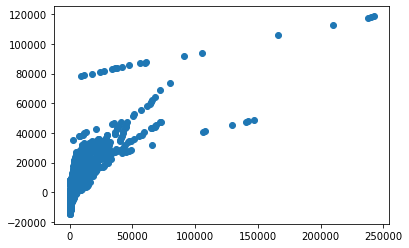

In [53]:
plt.scatter(y_test, y_pred)

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
# generalization error for test sets
print('The generalization error for the Linear Regression model is', round(mean_squared_error(y_true=y_test, y_pred=y_pred), 4))

The generalization error for the Linear Regression model is 239587906.3746


## Prepare Alternates Models

#### Gradient Boosting Regressor

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [55]:
reg = GradientBoostingRegressor(random_state = 42, learning_rate=0.1, n_estimators=500, max_depth=4)
reg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(max_depth=4, n_estimators=500, random_state=42)

In [56]:
y_pred_reg = reg.predict(X_test)

In [57]:
reg.score(X_test, y_test)

0.9990807942158848

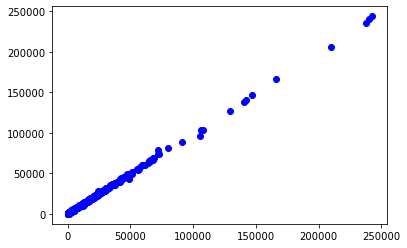

In [87]:
plt.scatter(y_test, y_pred_reg, c="blue", marker='o')

In [61]:
# generalization error for test sets
print('The generalization error for the Gradient Boosting Regression model is', round(mean_squared_error(y_true=y_test, y_pred=y_pred_reg), 4))

The generalization error for the Gradient Boosting Regression model is 545046.4858


#### Random Forest Regressor

In [62]:
reg_rfr = RandomForestRegressor(random_state=42, n_estimators=50, max_depth=4, min_samples_split=4)
reg_rfr.fit(X_train, y_train)

<ipython-input-62-d5ff67d35f79>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg_rfr.fit(X_train, y_train)


RandomForestRegressor(max_depth=4, min_samples_split=4, n_estimators=50,
                      random_state=42)

In [63]:
y_pred_rfr = reg_rfr.predict(X_test)

In [64]:
reg_rfr.score(X_test, y_test)

0.9303152859856522

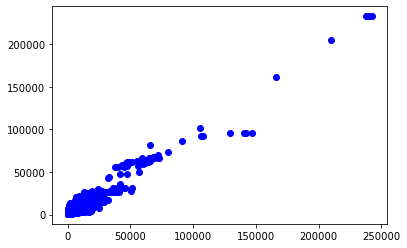

In [88]:
plt.scatter(y_test, y_pred_rfr, c="blue", marker='o')

In [66]:
# generalization error for test sets
print('The generalization error for the RandomForestRegression model is', round(mean_squared_error(y_true=y_test, y_pred=y_pred_rfr), 4))

The generalization error for the RandomForestRegression model is 41319810.1489


#### Decision Tree Regressor

In [67]:
reg_dtr = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_split=4, splitter='best')
reg_dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_split=4, random_state=42)

In [68]:
y_pred_dtr = reg_dtr.predict(X_test)

In [69]:
reg_dtr.score(X_test, y_test)

0.9067147456955877

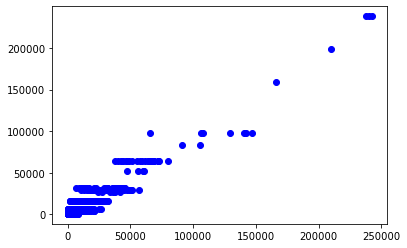

In [89]:
plt.scatter(y_test, y_pred_dtr, c="blue", marker='o')

In [90]:
# generalization error for test sets
print('The generalization error for the optimal DecisionTreeRegression model is', round(mean_squared_error(y_true=y_test, y_pred=y_pred_dtr), 4))

The generalization error for the optimal DecisionTreeRegression model is 55313838.2221


#### The Gradient Boosting Regressor model appears to work best for this dataset.